In [1]:
import h5py
import numpy as np
from typing import Dict
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

%reload_ext autoreload
%autoreload 2

In [23]:
def plot_sim(path:str="try/RUN_0", plot_name:str="plot_test_sim", case="side_hp", reshape=True):
    with h5py.File(path+"/pflotran.h5", "r") as file:
        list_to_plot = _make_plottable_and_2D(file, case, reshape)

    _plot_y(list_to_plot, path, name_pic=plot_name)
    try:
        print(f"Temperature at HP: {np.round(list_to_plot[11]['data'][9,23],4)}")
    except:
        print(f"Temperature at HP: {np.round(list_to_plot[11]['data'][23,9], 4)}")

def _make_plottable_and_2D(hdf5_file, case, reshape):
    list_to_plot = []
    for time in hdf5_file.keys():
        if not time in ["   0 Time  0.00000E+00 y", "Coordinates", "Provenance", "Time:  0.00000E+00 y"]:
            for property in hdf5_file[time].keys():
                data_dict = {"data" : np.array(hdf5_file[time][property]), "property" : str(property)} #+str(time)}
                if reshape:
                    data_dict["data"] = data_dict["data"] = data_dict["data"].reshape(20,150,16, order="F")
                if case=="side_hp":
                    data_dict["data"] = data_dict["data"][9,:,:].T
                elif case=="top_hp":
                    data_dict["data"] = data_dict["data"][:,:,9]
                else:
                    raise ValueError("Case not implemented")
                list_to_plot.append(data_dict)
    return list_to_plot

def _plot_y(data, path, name_pic="plot_y_exemplary"):
    n_subplots = len(data)
    _, axes = plt.subplots(n_subplots,1,sharex=True,figsize=(20,3*(n_subplots)))
    
    for index, data_point in enumerate(data):
        plt.sca(axes[index])
        plt.imshow(data_point["data"])
        plt.gca().invert_yaxis()

        plt.xlabel("y")
        plt.ylabel("x or z")
        _aligned_colorbar(label=data_point["property"])
    
    pic_file_name = f"{path}/{name_pic}.jpg"
    print(f"Resulting picture is at {pic_file_name}")  
    plt.savefig(pic_file_name)


def _aligned_colorbar(*args,**kwargs):
    cax = make_axes_locatable(plt.gca()).append_axes("right",size=0.3,pad=0.05)
    plt.colorbar(*args,cax=cax,**kwargs)
    

In [ ]:
plot_sim(path="groundtruth", plot_name="groundtruth_2_datapoints", reshape=False)
# new version below is better

Resulting picture is at try_perm/RUN_0/plot_test_sim.jpg
Temperature at HP: 2


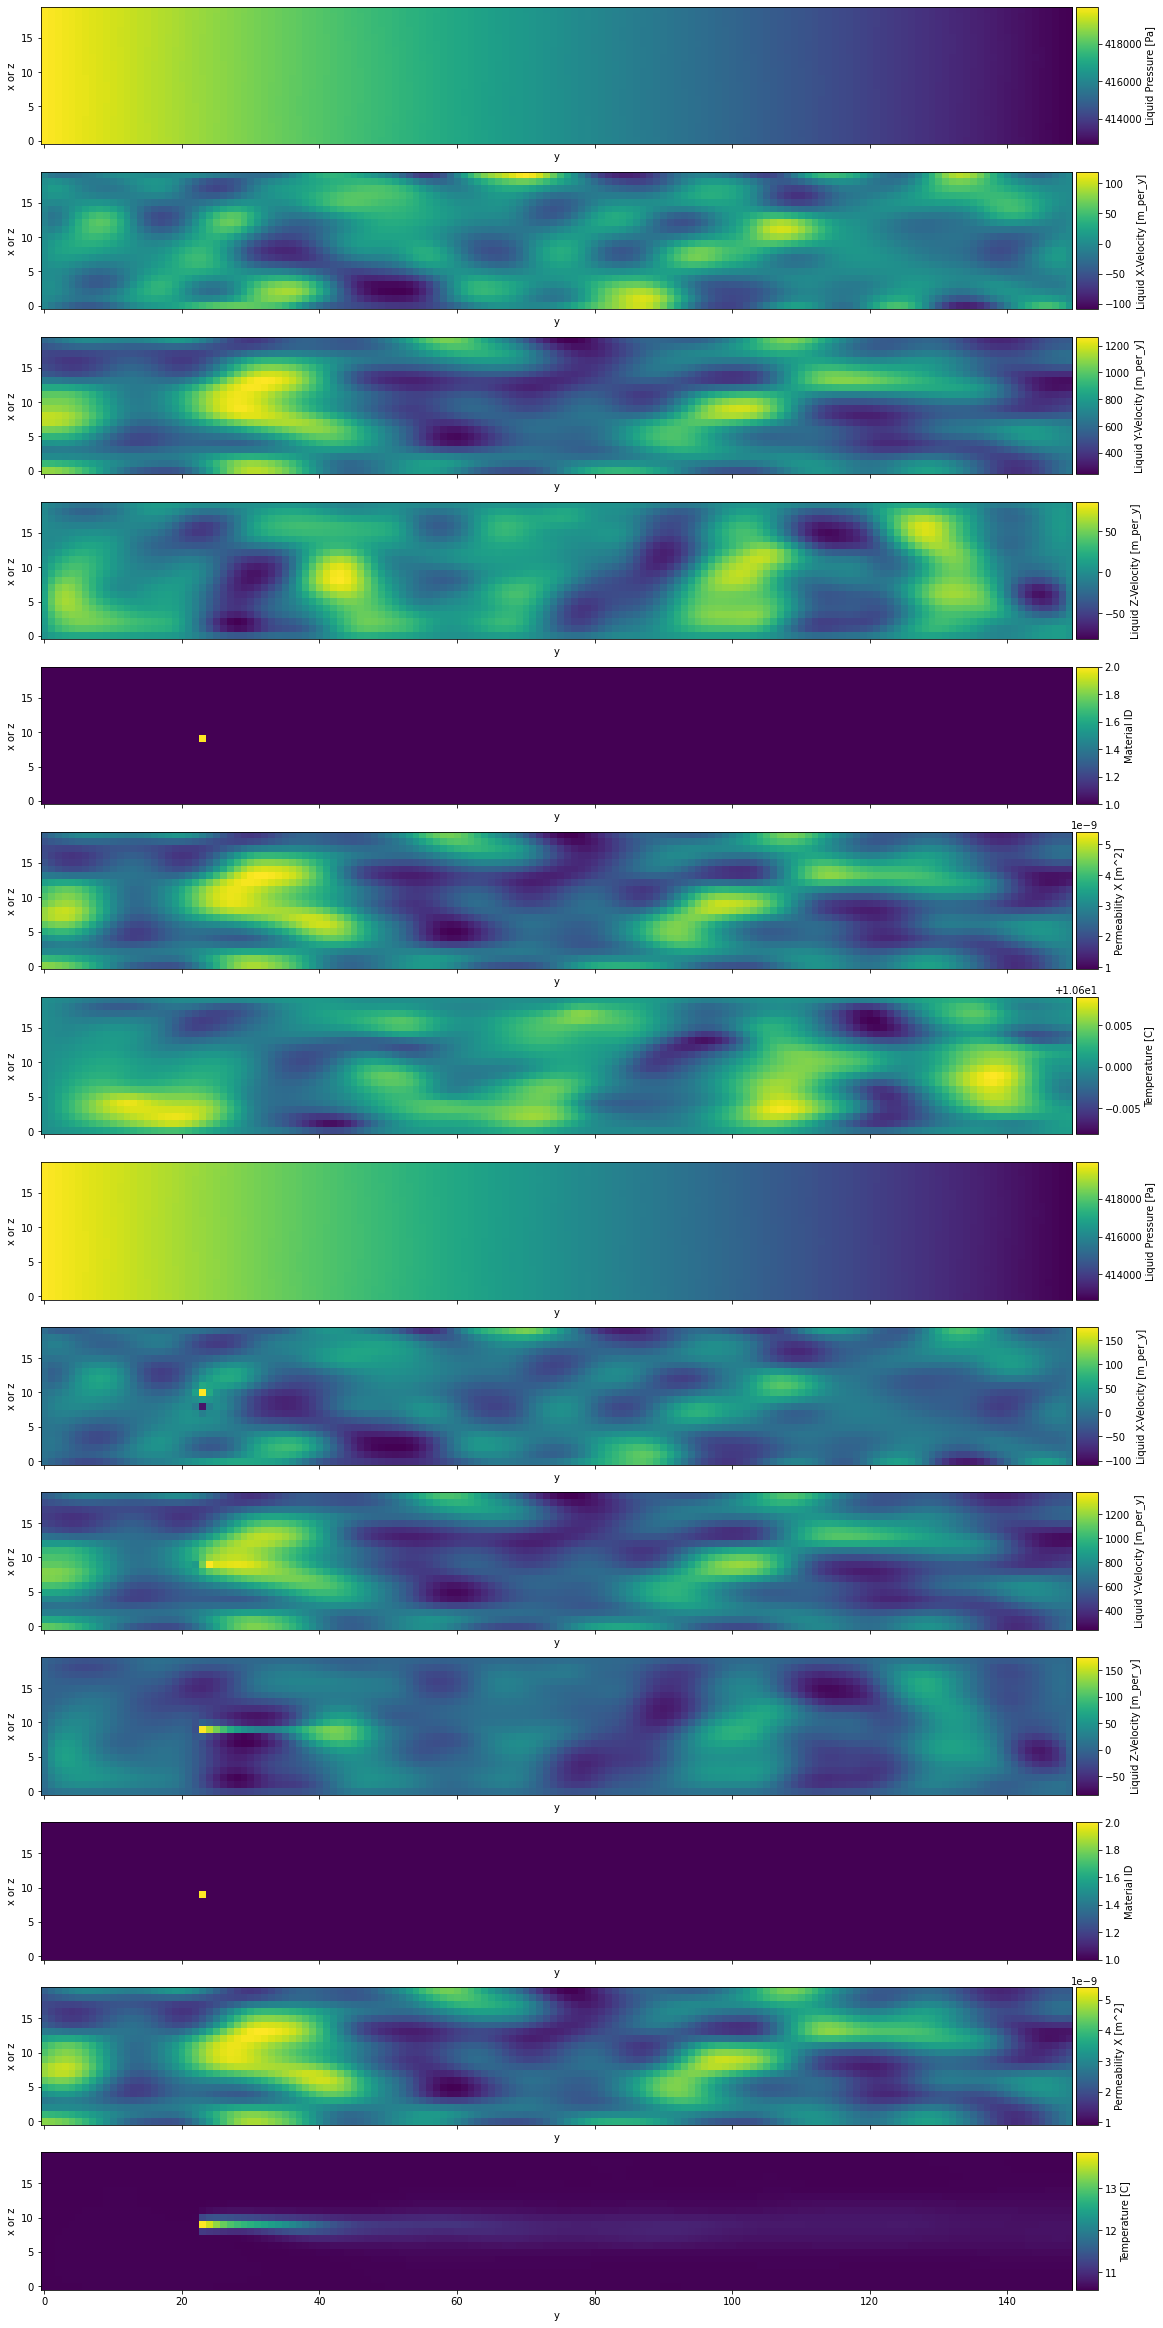

In [25]:
plot_sim(path="try_perm/RUN_0", case="top_hp")